In [9]:
import os

# 라이브러리 import
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
os.environ["openai_api_key"] = 

In [ ]:
system_prompt = """
당신은 영수증을 확인하는 사람입니다. 
영수증 이미지에서 [FORMAT] 형태로 작성해 주세요. 
만약 영수증 이미지에 나와있지 않다면 없음이라고 해주세요.

FORMAT:
- 가게명:
- 주소:
- 결제 일자:
- 상품 별 금액:
- 총 결제 금액: 
"""

# ChatOpenAI 챗모델을 초기화합니다.
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(
    llm, 
    system_prompt=system_prompt
)


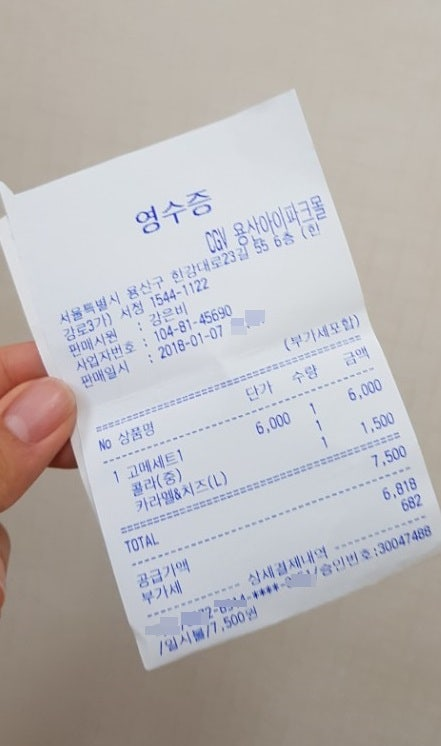

손에 들려 있는 영수증의 이미지입니다. 영수증 상단에는 "영수증"이라는 글자가 있고, 그 아래에 "CGV 용산아이파크몰"이라는 가게명이 적혀 있습니다. 주소는 서울특별시 용산구 한강대로23길 55 6층으로 나와 있습니다. 전화번호와 사업자 등록번호, 매장번호, 판매일자(2018-01-07) 등의 정보가 포함되어 있습니다. 

상품 내역으로는 "고메세트1"이 6,000원, "콜라(중)"이 1,500원, "카라멜팝콘(L)"이 7,500원으로 나와 있습니다. 총 결제 금액은 16,000원이며, 부가세는 682원입니다. 결제 방식은 신용카드로 되어 있습니다.

In [15]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "파란영수증1.jpg"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)